In [265]:
"""
The purpose of the algorithm is not to recover the original network but 
rather to identify important nodes and understand their impact on the network structure
"""
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [266]:
""" 
Remove nodes starting with highest betweenness centrality score
A node is having High betweenness centrality means it falls in between shortest paths of 
many nodes Due to this, there can be congestion in that particular node and leads to 
bottleneck and eventually Slows down the networkin most real-world networks, there are often
multiple shortest paths between pairs of nodes, not just one. So even if we remove a node
that lies on one shortest path, there may be other paths that can still connect the same 
pair of nodes.So by removing the node we force some traffic to take alternative routes
that improves network efficiency
"""
def optimize_graph_by_betweenness_centrality(G):
    # Compute the betweenness centrality for each node
    betweenness = nx.betweenness_centrality(G)
    print(betweenness)
    # Sort nodes in descending order based on betweenness centrality score
    sorted_nodes = sorted(betweenness, key=betweenness.get, reverse=True)
    print(sorted_nodes)
    threshold = 0.8  # We want to retain at least 80% of the nodes
    removed_nodes = set()
    for node in sorted_nodes:
        # Removing the node that is having the highest betweenness centrality
        print(node)
        G.remove_node(node)
        removed_nodes.add(node)
        if len(removed_nodes) > 0:
            remaining_graph = G.subgraph(G.nodes - removed_nodes)
            # Finding the largest connected component
            largest_cc = max(nx.connected_components(remaining_graph), key=len)
            # Checking whether the size of the largest connected component
            # of the subgraph obtained by removing nodes with high betweenness centrality
            # is smaller than a certain fraction of the size of the original network.
            if len(largest_cc) < threshold * len(G):
                break
    return G, removed_nodes

In [267]:
"""Finding Similarity between two graphs with respect to the betweenness centrality"""
def compare_betweenness_centrality(original_graph,optimized_graph,removed_nodes):
    """Setting the size to the size of the orginal graph"""
    # The second graph is the reduced graph
    reduced_graph = optimized_graph
    print(len(reduced_graph))
    # Calculate betweenness centrality for the first graph
    betweenness_centrality_original_graph = nx.betweenness_centrality(original_graph)
    # Calculate betweenness centrality for the second graph
    betweenness_centrality_reduced_graph = nx.betweenness_centrality(reduced_graph)
    print(betweenness_centrality_reduced_graph)
    # Calculate the average absolute difference between centrality values
    differences = []
    for node in original_graph.nodes():
        centrality1 = betweenness_centrality_original_graph[node]
        if node not in removed_nodes:
            centrality2 = betweenness_centrality_reduced_graph[node]
        else:
            centrality2 = 0
        difference = abs(centrality1 - centrality2)
        differences.append(difference)
    average_difference = sum(differences) / len(differences)
    # Calculate the similarity percentage
    similarity_percentage = (1 - average_difference) * 100
    return round(similarity_percentage,2)

In [268]:
"""Calculating Similarity between the original graph and the reduced graph with respect to the degree distribution"""
def calculate_degree_sequence(original_graph,optimized_graph):
    # Find the degree sequence
    """Finding the degree sequence of the Original Graph"""
    degree_sequence_original = [degree for node, degree in original_graph.degree()]

    # Print the degree sequence
    print("Degree sequence:", degree_sequence_original)

    # Find the degree sequence
    """Finding the degree sequence of the Reduced Graph"""
    degree_sequence_reduced = [degree for node, degree in optimized_graph.degree()]

    # Print the degree sequence
    print("Degree sequence:", degree_sequence_reduced)
    return degree_sequence_original,degree_sequence_reduced

In [269]:
"""Calculate Degree Distribution from a given degree and number of nodes"""
def calculate_degree_distribution(degree_sequence, size):
    # Initialize an array to store the degree distribution
    degree_distribution = np.zeros(size)
    # Calculate the degree distribution
    for degree in degree_sequence:
        if degree < size:
            degree_distribution[degree] += 1

    # Normalize the degree distribution to get probabilities
    degree_distribution = degree_distribution / len(degree_sequence)

    # Print the degree distribution array
    output = ", ".join(str(value) for value in degree_distribution)
    return degree_distribution

In [270]:
"""Two degree distributions 'array1' and 'array2' are compared and the similarity score is returned"""
def compare_degree_distributions(original_graph,optimized_graph):
    degree_sequence_original,degree_sequence_reduced=calculate_degree_sequence(original_graph,optimized_graph)
    size = len(original_graph)
    """Get the degree distribution for the degree sequence of the origianl graph"""
    degree_distribution_original = calculate_degree_distribution(degree_sequence_original, size)
    """Get the degree distribution for the degree sequence of the reduced graph"""
    degree_distribution_reduced = calculate_degree_distribution(degree_sequence_reduced, size)
    # Calculate Euclidean distance
    euclidean_distance = np.linalg.norm(degree_distribution_original - degree_distribution_reduced)
    # Calculate maximum possible distance
    max_distance = np.linalg.norm(np.ones_like(degree_distribution_original) - np.zeros_like(degree_distribution_reduced))
    # Normalize Euclidean distance to obtain similarity score
    similarity_score = 1 - (euclidean_distance / max_distance)
    return round(similarity_score*100,2)

<h>Note</h>
The clustering coefficient is a measure of how interconnected the nodes in a graph are. A higher clustering coefficient indicates a higher level of clustering or connectivity between the neighbors of a node.

In your case, the original graph has a clustering coefficient of 0.57, while the reduced graph has a clustering coefficient of 0.17. This implies that the original graph has a higher level of local clustering compared to the reduced graph.

The reduction in the clustering coefficient could be due to the removal of certain edges or nodes in the reduced graph. When edges or nodes are removed, it can disrupt the local connectivity and decrease the clustering coefficient.

A lower clustering coefficient in the reduced graph suggests that the nodes in the graph are less interconnected, and there may be fewer clusters or communities present compared to the original graph. This reduction in clustering could indicate a loss of local structure or a more dispersed network configuration.

Overall, the difference in clustering coefficients between the original and reduced graphs can provide insights into the structural changes and the level of clustering in the network. It can be used to study the impact of network modifications or analyze the resilience and robustness of the graph's connectivity.

The characterization of the reduced graph as "bad" or not depends on the specific context and goals of your analysis. The reduced graph may not necessarily be considered "bad," but rather different or simplified compared to the original graph.

Reducing a graph can be done for various reasons, such as improving computational efficiency, removing noise or outliers, or focusing on specific aspects of the network. It may help in identifying the core structure or essential relationships within the graph.

However, it's important to consider the implications of the reduction. Removing nodes or edges can result in a loss of information and potentially alter the characteristics of the graph. If the reduced graph still captures the essential properties or patterns you are interested in, it can be considered a useful simplification.

It's crucial to evaluate the reduced graph in relation to your specific analysis objectives. If the reduction significantly impacts the interpretation or understanding of the network, you may need to reassess the approach or consider alternative methods to retain more of the original graph's structure.

Ultimately, whether the reduced graph is considered "bad" or not depends on its utility and relevance to the particular analysis or problem at hand.

In [271]:
def compare_clustering_coefficient(original_graph,optimized_graph):
    original_clustering_coefficient = nx.average_clustering(original_graph)

    print("Clustering Coefficient of Original Graph:",original_clustering_coefficient)

    reduced_clustering_coefficient = nx.average_clustering(optimized_graph)

    print("Clustering Coefficient of Reduced Graph:", reduced_clustering_coefficient)

    similarity_clustering_coefficient = reduced_clustering_coefficient / original_clustering_coefficient
    return round(similarity_clustering_coefficient*100, 2)

In [272]:
def compare_eigen_vector_centrality(original_graph,optimized_graph):# Calculate eigenvector centralities
    eigenvector_centrality_original = nx.eigenvector_centrality(original_graph)
    eigenvector_centrality_reduced = nx.eigenvector_centrality(optimized_graph)
    # Get the common nodes present in both graphs
    common_nodes = set(eigenvector_centrality_original.keys()).intersection(eigenvector_centrality_reduced.keys())
    # Extract the centralities for the common nodes
    eigenvector_centrality_original = np.array([eigenvector_centrality_original[node] for node in common_nodes])
    eigenvector_centrality_reduced = np.array([eigenvector_centrality_reduced[node] for node in common_nodes])
    # Normalize the centralities by dividing by the maximum centrality value
    max_centrality = max(np.max(eigenvector_centrality_original),np.max(eigenvector_centrality_reduced))
    normalized_centrality_original = eigenvector_centrality_original / max_centrality
    normalized_centrality_reduced = eigenvector_centrality_reduced / max_centrality
    # Calculate the Mean Squared Error (MSE)
    mse = np.mean((normalized_centrality_original - normalized_centrality_reduced) ** 2)
    # Convert the MSE to a percentage scale
    similarity_percentage = 100 * (1 - mse)
    return round(similarity_percentage, 2)

In [273]:
def average_path_length(graph):
    total_length = 0
    num_pairs = 0
    for source in graph.nodes():
        for target in graph.nodes():
            if source != target:
                try:
                    length = nx.shortest_path_length(graph, source, target)
                    total_length += length
                    num_pairs += 1
                except nx.NetworkXNoPath:
                    continue
    if num_pairs > 0:
        return total_length / num_pairs
    else:
        return 0

In [274]:
def compare_average_path_length(original_graph,optimized_graph):
    # Calculate the average path length
    average_path_length_original = average_path_length(original_graph)
    average_path_length_reduced = average_path_length(optimized_graph)

    # Print the average path length
    similarity_avg_path_length = round(1-abs(average_path_length_reduced-average_path_length_original)/max(average_path_length_original, average_path_length_reduced), 2)*100
    return similarity_avg_path_length

The formula `(graph1.number_of_nodes() * (graph1.number_of_nodes() - 1) / 2)` calculates the total number of possible pairs of nodes in `graph1` excluding self-loops. 

When computing the Jaccard similarity, we are interested in comparing pairs of nodes that do not have an edge between them in `graph2`. To calculate the similarity as a percentage, we need to divide the number of such pairs with non-zero Jaccard similarity by the total number of possible pairs.

The total number of possible pairs of nodes in `graph1` excluding self-loops can be calculated as `(graph1.number_of_nodes() * (graph1.number_of_nodes() - 1) / 2)`. We divide `num_pairs` (the number of pairs with non-zero Jaccard similarity) by this total number of possible pairs, and then multiply by 100 to express the result as a percentage. This gives us the similarity percentage.

By using this formula, we can obtain a normalized measure of similarity between the graphs that accounts for the total possible pairs of nodes in `graph1`.

In [275]:
def calculate_jaccard_similarity(graph1, graph2):
    jaccard_scores = []
    for u, v in itertools.combinations(graph1.nodes(), 2):
        if not graph2.has_edge(u, v):
            intersection = len(set(graph1.neighbors(u)).intersection(graph1.neighbors(v)))
            union = len(set(graph1.neighbors(u)).union(graph1.neighbors(v)))
            jaccard_scores.append((u, v, intersection / union))
    # Calculate the similarity as a percentage
    num_pairs = len(jaccard_scores)
    similarity_percentage = (num_pairs / (graph1.number_of_nodes() * (graph1.number_of_nodes() - 1) / 2)) * 100
    return round(similarity_percentage,2)

In [276]:
def draw_graph(graph):
    fig, ax = plt.subplots(figsize=(6, 6))
    nx.draw_networkx(graph, pos=nx.spring_layout(graph, k=0.3), with_labels=True, node_size=100,font_size=10, node_color='lightblue', edge_color='black', width=1.0, alpha=0.7, ax=ax)

In [277]:
# Load the original graph
original_graph= nx.karate_club_graph()
G=original_graph.copy()
print(G)

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


{0: 0.43763528138528146, 1: 0.053936688311688304, 2: 0.14365680615680618, 3: 0.011909271284271283, 4: 0.0006313131313131313, 5: 0.02998737373737374, 6: 0.029987373737373736, 7: 0.0, 8: 0.05592682780182781, 9: 0.0008477633477633478, 10: 0.0006313131313131313, 11: 0.0, 12: 0.0, 13: 0.04586339586339586, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.03247504810004811, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.017613636363636363, 24: 0.0022095959595959595, 25: 0.0038404882154882154, 26: 0.0, 27: 0.02233345358345358, 28: 0.0017947330447330447, 29: 0.0029220779220779218, 30: 0.014411976911976909, 31: 0.13827561327561325, 32: 0.145247113997114, 33: 0.30407497594997596}
[0, 33, 32, 2, 31, 8, 1, 13, 19, 5, 6, 27, 23, 30, 3, 25, 29, 24, 28, 9, 4, 10, 7, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26]
0
33
32
{0, 33, 32}


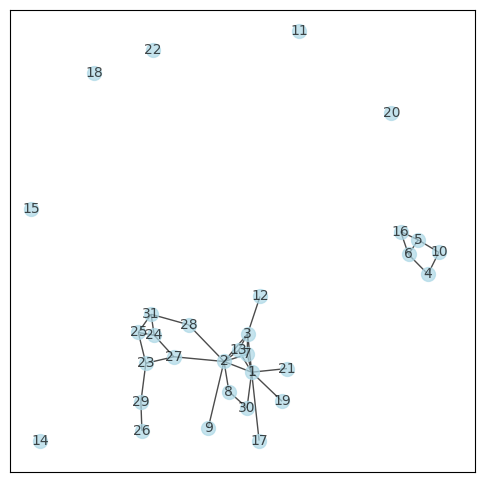

In [278]:
optimized_graph, removed_nodes = optimize_graph_by_betweenness_centrality(G)
# Draw the remaining graph
print(removed_nodes)
draw_graph(optimized_graph)

In [279]:
"""Calculating the similarity between the Graphs with respect to the parameter 'Betweenness Centrality'"""
print('Similarity of Betweenness Centrality is ',compare_betweenness_centrality(original_graph,optimized_graph,removed_nodes),'%')

31
{1: 0.13869731800766283, 2: 0.24559386973180078, 3: 0.042145593869731796, 4: 0.0011494252873563218, 5: 0.0034482758620689655, 6: 0.0034482758620689655, 7: 0.0, 8: 0.011494252873563218, 9: 0.0, 10: 0.0011494252873563218, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.08850574712643676, 24: 0.012643678160919542, 25: 0.013793103448275862, 26: 0.0, 27: 0.135632183908046, 28: 0.0367816091954023, 29: 0.041379310344827586, 30: 0.004597701149425287, 31: 0.01724137931034483}
Similarity of Betweenness Centrality is  95.03 %


In [280]:
"""Calculating the similarity between the Graphs with respect to the parameter 'Degree Distribution'"""
print('Similarity of Degree Distribution is ',compare_degree_distributions(original_graph,optimized_graph),'%')

Degree sequence: [16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]
Degree sequence: [8, 8, 5, 2, 3, 3, 3, 2, 1, 2, 0, 1, 3, 0, 0, 2, 1, 0, 1, 0, 1, 0, 3, 3, 3, 1, 3, 2, 2, 2, 3]
Similarity of Degree Distribution is  93.74 %


In [281]:
"""Calculating the similarity between the Graphs with respect to the parameter 'Clustering Coefficient'"""
print('Similarity of Clustering Coefficient is ',compare_clustering_coefficient(original_graph,optimized_graph),'%')

Clustering Coefficient of Original Graph: 0.5706384782076823
Clustering Coefficient of Reduced Graph: 0.17818740399385558
Similarity of Clustering Coefficient is  31.23 %


In [282]:
"""Calculating the similarity between the Graphs with respect to the parameter 'Eigen Vector Centrality'"""
print('Similarity of Eigen Vector Centrality is ',compare_eigen_vector_centrality(original_graph,optimized_graph),'%')

Similarity of Eigen Vector Centrality is  96.12 %


In [283]:
"""Calculating the similarity between the Graphs with respect to the parameter 'Average Path Length'"""
print('Similarity of Average Path Length is ',compare_average_path_length(original_graph,optimized_graph),'%')

Similarity of Average Path Length is  88.0 %


In [284]:
"""Calculating the Jaccard similarity between the Graphs with respect to the parameter 'Average Path Length'"""
print('Jaccard Similarity is ',calculate_jaccard_similarity(original_graph,optimized_graph),'%')

Jaccard Similarity is  93.94 %
